In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
comunas_rm = [
13101,
13102,
13103,
13104,
13105,
13106,
13107,
13108,
13109,
13110,
13111,
13112,
13113,
13114,
13115,
13116,
13117,
13118, 
13119, 
13120, 
13121,
13122,
13123,
13124,
13125,
13126,
13127,
13128, 
13129,
13130,
13131,
13132,]

In [70]:
properties = pd.read_csv('BRORGA2441NL_NAC_2023_2.csv', encoding='latin-1', sep='|')

properties.columns = ['Código SII de la Comuna',
'Número de Manzana',
'Número de Predial',
'Número correlativo de la línea de construcción',
'Código del material estructural de la línea de construcción',
'Código de calidad de la línea de construcción',
'Año de la línea de construcción',
'Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción',
'Código de destino de la línea de construcción',
'Código de condición especial de la línea de construcción']

In [87]:
properties_df = properties.copy()
properties_df['rol'] = properties_df['Número de Manzana'].astype(str) + '-' + properties_df['Número de Predial'].astype(str)
properties_df['CM'] = properties_df['Código SII de la Comuna'].astype(str) + '-' + properties_df['Número de Manzana'].astype(str)
# properties_df = properties_df[properties_df['Código de destino de la línea de construcción'] == 'G']
properties_df.set_index(['rol', 'CM'], inplace=True)

In [88]:
properties_df

Código SII de la Comuna  Número de Manzana  \
rol     CM                                                        
1-4     1101-1                          1101                  1   
        1101-1                          1101                  1   
1-5     1101-1                          1101                  1   
        1101-1                          1101                  1   
1-6     1101-1                          1101                  1   
...                                      ...                ...   
90160-6 16404-90160                    16404              90160   
        16404-90160                    16404              90160   
        16404-90160                    16404              90160   
        16404-90160                    16404              90160   
        16404-90160                    16404              90160   

                     Número de Predial  \
rol     CM                               
1-4     1101-1                       4   
        1101-1                       4   
1-5     1101-1                       5   
        1101-1                       5   
1-6     1101-1                       6   
...                                ...   
90160-6 16404-90160                  6   
        16404-90160                  6   
        16404-90160                  6   
        16404-90160                  6   
        16404-90160                  6   

                     Número correlativo de la línea de construcción  \
rol     CM                                                            
1-4     1101-1                                                    2   
        1101-1                                                    3   
1-5     1101-1                                                    1   
        1101-1                                                    2   
1-6     1101-1                                                    1   
...                                                             ...   
90160-6 16404-90160                                               2   
        16404-90160                                               3   
        16404-90160                                               4   
        16404-90160                                               5   
        16404-90160                                               6   

                    Código del material estructural de la línea de construcción  \
rol     CM                                                                        
1-4     1101-1                                                      E             
        1101-1                                                      C             
1-5     1101-1                                                      B             
        1101-1                                                      GB            
1-6     1101-1                                                      B             
...                                                                ...            
90160-6 16404-90160                                                 GC            
        16404-90160                                                 GC            
        16404-90160                                                 C             
        16404-90160                                                 E             
        16404-90160                                                 C             

                     Código de calidad de la línea de construcción  \
rol     CM                                                           
1-4     1101-1                                                   3   
        1101-1                                                   3   
1-5     1101-1                                                   4   
        1101-1                                                   2   
1-6     1101-1                                                   4   
...                                                            ...   
90160-6 16404-90160                   

In [89]:
properties_info = pd.read_csv('BRORGA2441N_NAC_2023_2.csv', encoding='latin-1', sep='|')
properties_info.columns =  [
'Código SII de la Comuna',
'Número de Manzana',
'Número de Predial',
'Dirección o nombre del predio',
'Avalúo fiscal total',
'Contribución semestral (con aseo)',
'Código de destino principal',
'Avalúo exento de la propiedad',
'Código SII de la Comuna Rol Bien Común 1',
'Número de Manzana Rol Bien Común 1',
'Número de predio Rol Bien Común 1',
'Código SII de la Comuna Rol Bien Común 2',
'Número de Manzana Rol Bien Común 2',
'Número de predio Rol Bien Común 2',
'Superficie total del terreno de la propiedad (sin decimales, en m2)']

In [90]:
properties_info.head()

,Código SII de la Comuna,Número de Manzana,Número de Predial,Dirección o nombre del predio,Avalúo fiscal total,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
0,1101,1,5,M LIRA 315,140818898,0,O,140818898,0,0,0,0,0,0,566
1,1101,1,6,M LIRA 315,39537563,0,O,39537563,0,0,0,0,0,0,126
2,1101,1,8,M LIRA S/N TERMINAL PESQUERO,1934907470,10322732,C,0,0,0,0,0,0,0,8025
3,1101,1,10,MAXIMO LIRA 389,830168525,4428950,O,0,0,0,0,0,0,0,1588
4,1101,1,12,TERMINAL PESQUERO,56253026,0,C,56253026,0,0,0,0,0,0,211


In [91]:
properties_info_df = properties_info.copy()
properties_info_df['rol'] = properties_info_df['Número de Manzana'].astype(str) + '-' + properties_info_df['Número de Predial'].astype(str)
properties_info_df['CM'] = properties_info_df['Código SII de la Comuna'].astype(str) + '-' + properties_info_df['Número de Manzana'].astype(str)
# properties_info_df = properties_info_df[properties_info_df['Código de destino principal'] == 'G']
properties_info_df.set_index(['rol', 'CM'], inplace=True)

In [92]:
properties_info_df

,,Código SII de la Comuna,Número de Manzana,Número de Predial,Dirección o nombre del predio,Avalúo fiscal total,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
rol,CM,,,,,,,,,,,,,,,
1-5,1101-1,1101,1,5,M LIRA 315,140818898,0,O,140818898,0,0,0,0,0,0,566
1-6,1101-1,1101,1,6,M LIRA 315,39537563,0,O,39537563,0,0,0,0,0,0,126
1-8,1101-1,1101,1,8,M LIRA S/N TERMINAL PESQUERO,1934907470,10322732,C,0,0,0,0,0,0,0,8025
1-10,1101-1,1101,1,10,MAXIMO LIRA 389,830168525,4428950,O,0,0,0,0,0,0,0,1588
1-12,1101-1,1101,1,12,TERMINAL PESQUERO,56253026,0,C,56253026,0,0,0,0,0,0,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087-27,16404-5087,16404,5087,27,G MARTINEZ V 217,15257408,0,H,15257408,0,0,0,0,0,0,78
5087-28,16404-5087,16404,5087,28,G MARTINEZ V 221,15257408,0,H,15257408,0,0,0,0,0,0,78
5087-29,16404-5087,16404,5087,29,G MARTINEZ V 225,15257408,0,H,15257408,0,0,0,0,0,0,78


In [93]:
properties_result = pd.merge(properties_df, properties_info_df, on=['rol', 'CM'], how='left')

In [94]:
comuna_columns = [col for col in properties_result.columns if 'Código SII de la Comuna' in col]
conditions = (properties_result[comuna_columns[0]].isin(comunas_rm))
for col in comuna_columns[1:]:
    conditions = conditions | (properties_result[col].isin(comunas_rm))
properties_result = properties_result[conditions]
properties_result

Código SII de la Comuna_x  Número de Manzana_x  \
rol     CM                                                            
1-1     13101-1                          13101                    1   
        13101-1                          13101                    1   
        13101-1                          13101                    1   
1-2     13101-1                          13101                    1   
        13101-1                          13101                    1   
...                                        ...                  ...   
85008-1 13101-85008                      13101                85008   
        13101-85008                      13101                85008   
        13101-85008                      13101                85008   
        13101-85008                      13101                85008   
85008-2 13101-85008                      13101                85008   

                     Número de Predial_x  \
rol     CM                                 
1-1     13101-1                        1   
        13101-1                        1   
        13101-1                        1   
1-2     13101-1                        2   
        13101-1                        2   
...                                  ...   
85008-1 13101-85008                    1   
        13101-85008                    1   
        13101-85008                    1   
        13101-85008                    1   
85008-2 13101-85008                    2   

                     Número correlativo de la línea de construcción  \
rol     CM                                                            
1-1     13101-1                                                   1   
        13101-1                                                   2   
        13101-1                                                   3   
1-2     13101-1                                                   1   
        13101-1                                                   2   
...                                                             ...   
85008-1 13101-85008                                               1   
        13101-85008                                               2   
        13101-85008                                               3   
        13101-85008                                               4   
85008-2 13101-85008                                               1   

                    Código del material estructural de la línea de construcción  \
rol     CM                                                                        
1-1     13101-1                                                     B             
        13101-1                                                     B             
        13101-1                                                     B             
1-2     13101-1                                                     B             
        13101-1                                                     B             
...                                                                ...            
85008-1 13101-85008                                                 B             
        13101-85008                                                 B             
        13101-85008                                                 B             
        13101-85008                                                 B             
85008-2 13101-85008                                                 B             

                     Código de calidad de la línea de construcción  \
rol     CM                                                           
1-1     13101-1                                                  3   
        13101-1                                                  3   
        13101-1                                                  3   
1-2     13101-1                                                  3   
        13101-1                                                  3   
...                           

### Descripción DF


In [95]:
properties_result.describe()

,Código SII de la Comuna_x,Número de Manzana_x,Número de Predial_x,Número correlativo de la línea de construcción,Código de calidad de la línea de construcción,Año de la línea de construcción,"Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción",Código SII de la Comuna_y,Número de Manzana_y,Número de Predial_y,Avalúo fiscal total,Contribución semestral (con aseo),Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
count,353697.0,353697.000000,353697.000000,353697.000000,353697.000000,353697.000000,353697.000000,353697.0,353697.000000,353697.000000,3.536970e+05,3.536970e+05,3.536970e+05,353697.000000,353697.000000,353697.000000,353697.000000,353697.000000,353697.000000,353697.000000
mean,13101.0,555.729415,1338.191288,1.303480,3.173154,1998.517977,49.730119,13101.0,555.729415,1338.191288,1.718621e+08,3.782199e+05,5.498197e+07,12550.027345,534.221201,86333.842266,0.148161,0.000927,1.018691,49.086014
std,0.0,813.840934,9422.396484,0.702088,0.701703,63.225127,283.421357,0.0,813.840934,9422.396484,1.493460e+09,6.037408e+06,7.697592e+08,2629.589594,495.178876,18090.274325,44.057202,0.275757,302.918906,518.421186
min,13101.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,13101.0,1.000000,1.000000,1.895880e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13101.0,217.000000,133.000000,1.000000,3.000000,1999.000000,3.000000,13101.0,217.000000,133.000000,7.888194e+06,0.000000e+00,0.000000e+00,13101.000000,202.000000,90001.000000,0.000000,0.000000,0.000000,0.000000
50%,13101.0,474.000000,286.000000,1.000000,3.000000,2008.000000,14.000000,13101.0,474.000000,286.000000,4.174363e+07,2.750000e+04,3.486987e+07,13101.000000,465.000000,90027.000000,0.000000,0.000000,0.000000,0.000000
75%,13101.0,641.000000,495.000000,2.000000,4.000000,2013.000000,42.000000,13101.0,641.000000,495.000000,6.350395e+07,6.795000e+04,5.453305e+07,13101.000000,632.000000,90176.000000,0.000000,0.000000,0.000000,0.000000
max,13101.0,85008.000000,90998.000000,29.000000,5.000000,2022.000000,27162.000000,13101.0,85008.000000,90998.000000,1.078410e+11,5.286886e+08,1.078410e+11,13101.000000,85005.000000,90998.000000,13101.000000,82.000000,90077.000000,55675.000000


In [97]:
properties_result['Código del material estructural de la línea de construcción'].value_counts()

B     335487
C      11579
F       1479
A       1415
E       1391
GA      1267
GB       362
P        265
GE       162
G        134
GC        75
W         47
K         13
GF        10
TA         4
EB         3
TE         3
SB         1
Name: Código del material estructural de la línea de construcción, dtype: int64

In [98]:
properties_result['Año de la línea de construcción'].value_counts().sort_index()

0        312
1550       2
1600       2
1654       1
1700       2
        ... 
2018    6056
2019    4493
2020    4007
2021    5557
2022    7300
Name: Año de la línea de construcción, Length: 148, dtype: int64

In [99]:
properties_result['Código de destino principal'].value_counts()


H    196382
L     65361
Z     51938
O     16481
C     16265
K      3729
E      1232
G       891
I       456
P       308
V       226
Q       148
S       117
T       112
D        51
Name: Código de destino principal, dtype: int64

In [100]:

distribucion = properties_result.groupby(['Año de la línea de construcción', 'Código SII de la Comuna_x']).size().unstack()

distribucion.head()

Código SII de la Comuna_x,13101
Año de la línea de construcción,
0,312
1550,2
1600,2
1654,1
1700,2


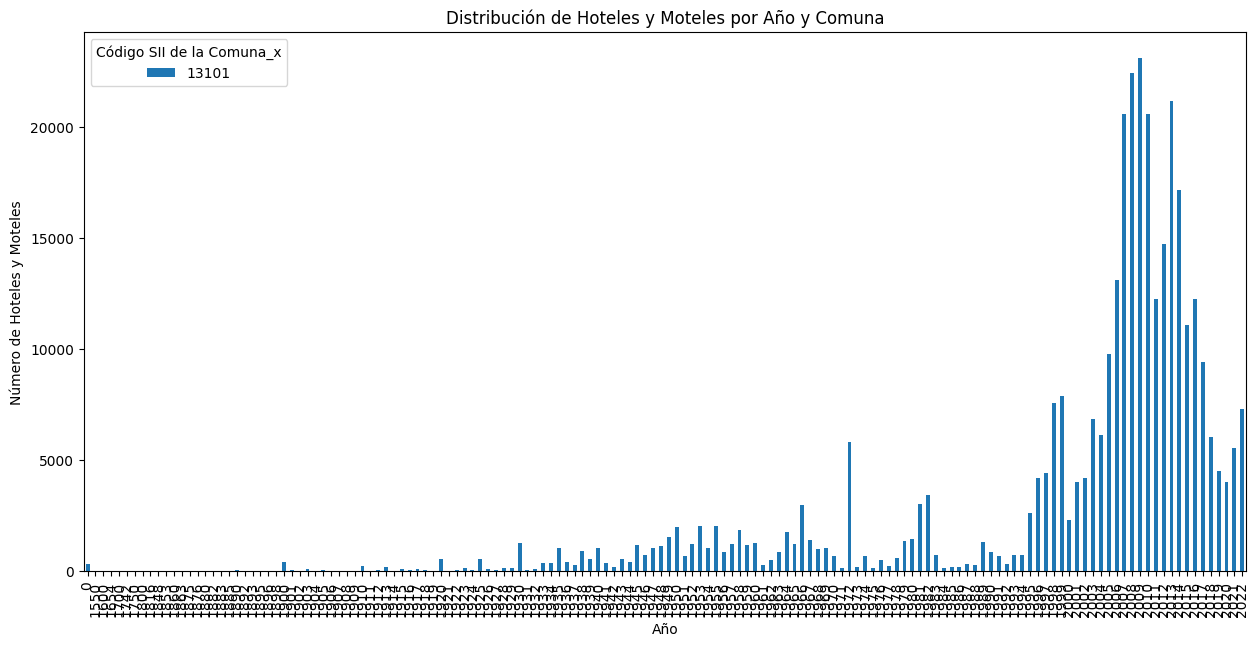

In [101]:
distribucion.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Distribución de Hoteles y Moteles por Año y Comuna')
plt.ylabel('Número de Hoteles y Moteles')
plt.xlabel('Año')
plt.show()

Filtro por rubto hotelería

In [103]:
properties_result = properties_result[properties_result['Código de destino principal'] == 'G']
properties_result

Código SII de la Comuna_x  Número de Manzana_x  \
rol      CM                                                           
1-69     13101-1                         13101                    1   
         13101-1                         13101                    1   
         13101-1                         13101                    1   
         13101-1                         13101                    1   
         13101-1                         13101                    1   
...                                        ...                  ...   
1780-377 13101-1780                      13101                 1780   
         13101-1780                      13101                 1780   
1923-65  13101-1923                      13101                 1923   
         13101-1923                      13101                 1923   
1923-426 13101-1923                      13101                 1923   

                     Número de Predial_x  \
rol      CM                                
1-69     13101-1                      69   
         13101-1                      69   
         13101-1                      69   
         13101-1                      69   
         13101-1                      69   
...                                  ...   
1780-377 13101-1780                  377   
         13101-1780                  377   
1923-65  13101-1923                   65   
         13101-1923                   65   
1923-426 13101-1923                  426   

                     Número correlativo de la línea de construcción  \
rol      CM                                                           
1-69     13101-1                                                  1   
         13101-1                                                  2   
         13101-1                                                  3   
         13101-1                                                  4   
         13101-1                                                  5   
...                                                             ...   
1780-377 13101-1780                                               1   
         13101-1780                                               2   
1923-65  13101-1923                                               1   
         13101-1923                                               2   
1923-426 13101-1923                                               1   

                    Código del material estructural de la línea de construcción  \
rol      CM                                                                       
1-69     13101-1                                                    B             
         13101-1                                                    B             
         13101-1                                                    B             
         13101-1                                                    B             
         13101-1                                                    B             
...                                                                ...            
1780-377 13101-1780                                                 B             
         13101-1780                                                 B             
1923-65  13101-1923                                                 B             
         13101-1923                                                 B             
1923-426 13101-1923                                                 B             

                     Código de calidad de la línea de construcción  \
rol      CM                                                          
1-69     13101-1                                                 3   
         13101-1                                                 3   
         13101-1                                                 3   
         13101-1                                                 3   
         13101-1                                                 4   
...                           